In [91]:
import numpy as np
import matplotlib.pyplot as plt

          x1        x2  y
0   4.672338  3.142654  0
1   4.399361  6.149309  1
2   5.931280  3.651942  0
3   4.398293  4.993341  1
4   4.780328  1.908263  0
5   5.314247  5.901899  1
6   6.031000  3.016549  0
7   5.087047  2.551832  0
8   4.536582  4.832468  1
9   5.542560  6.827680  1
10  5.647689  6.713482  1
11  5.328751  2.781106  0
12  4.539361  5.311687  1
13  5.005113  2.462833  0
14  4.191506  2.090478  0
15  6.477894  4.284151  0
16  3.849006  5.000929  1
17  4.354880  2.576031  0
18  4.498243  1.648970  0
19  4.323078  2.502172  0


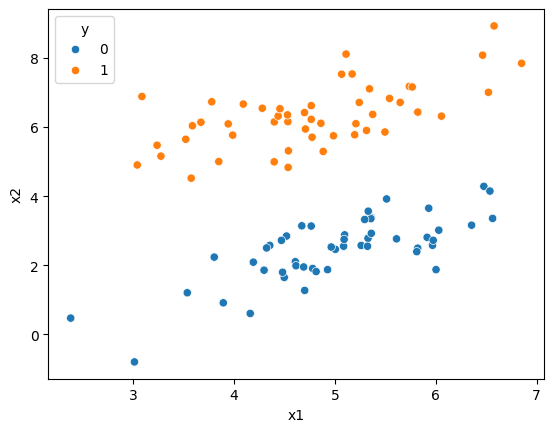

In [92]:
import pandas as pd
import seaborn as sns

np.random.seed(42)

def sep_line(x):
    return 0.7*x + 1

x1 = np.random.normal(loc= 5, scale= 1, size= 100)
x2 = [sep_line(x1[i]) + np.random.normal(loc= 2, scale= 0.7, size= 1)[0] for i in range(50)]
x3 = [sep_line(x1[i]) - np.random.normal(loc= 2, scale= 0.7, size= 1)[0] for i in range(50, 100)]
x2 = x2+x3
y = [1 for i in range(50)] + [0 for i in range(50)]

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=data)
print(data.head(20))




In [93]:
class Perceptron:

    def __init__(self, lr=0.01, n_iter=500, random_state=42):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weigth_ = rgen.normal(loc=0.0, scale=0.0001, size=X.shape[1])
        self.bias_ = float(0.0)
        self.update = []
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X,y):
                update = self.lr * (target - self.predict(x))
                self.weigth_ += update * x
                self.bias_ += update
                errors += int(update != 0.0)
                #print(update, target - self.predict(x))
            self.update.append(update)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weigth_) + self.bias_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

[53, 50, 51, 52, 51, 50, 51, 50, 51, 52, 50, 52, 50, 50, 51, 51, 51, 51, 50, 51, 50, 52, 50, 51, 51, 52, 50, 52, 50, 50, 50, 51, 51, 50, 52, 50, 50, 52, 50, 50, 52, 50, 50, 51, 51, 50, 51, 50, 52, 50]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


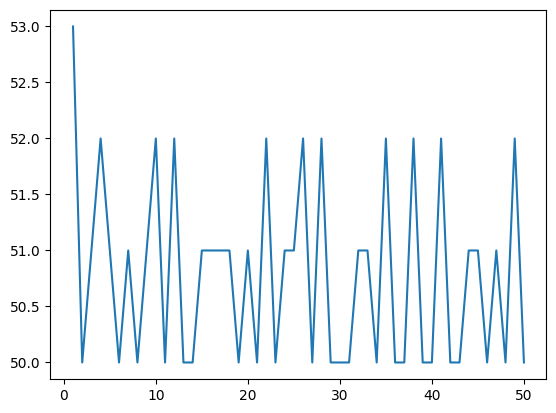

In [94]:
from sklearn.preprocessing import StandardScaler
y = data['y'].values
X = data[['x1', 'x2']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

percep = Perceptron(lr=0.01, n_iter=50)
percep.fit(X, y)

plt.plot(range(1, len(percep.errors_)+1), percep.errors_)
print(percep.errors_)
print(percep.update)



In [95]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    if ax is None:
        plt.contourf(xx1, xx2, lab, alpha=0.1, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    else:
        ax.contourf(xx1, xx2, lab, alpha=0.1, cmap=cmap)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        if ax is None:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        edgecolor='black')
        else:
            ax.scatter(x=X[y == cl, 0], 
                       y=X[y == cl, 1],
                       alpha=0.8, 
                       c=colors[idx],
                       marker=markers[idx], 
                       edgecolor='black')

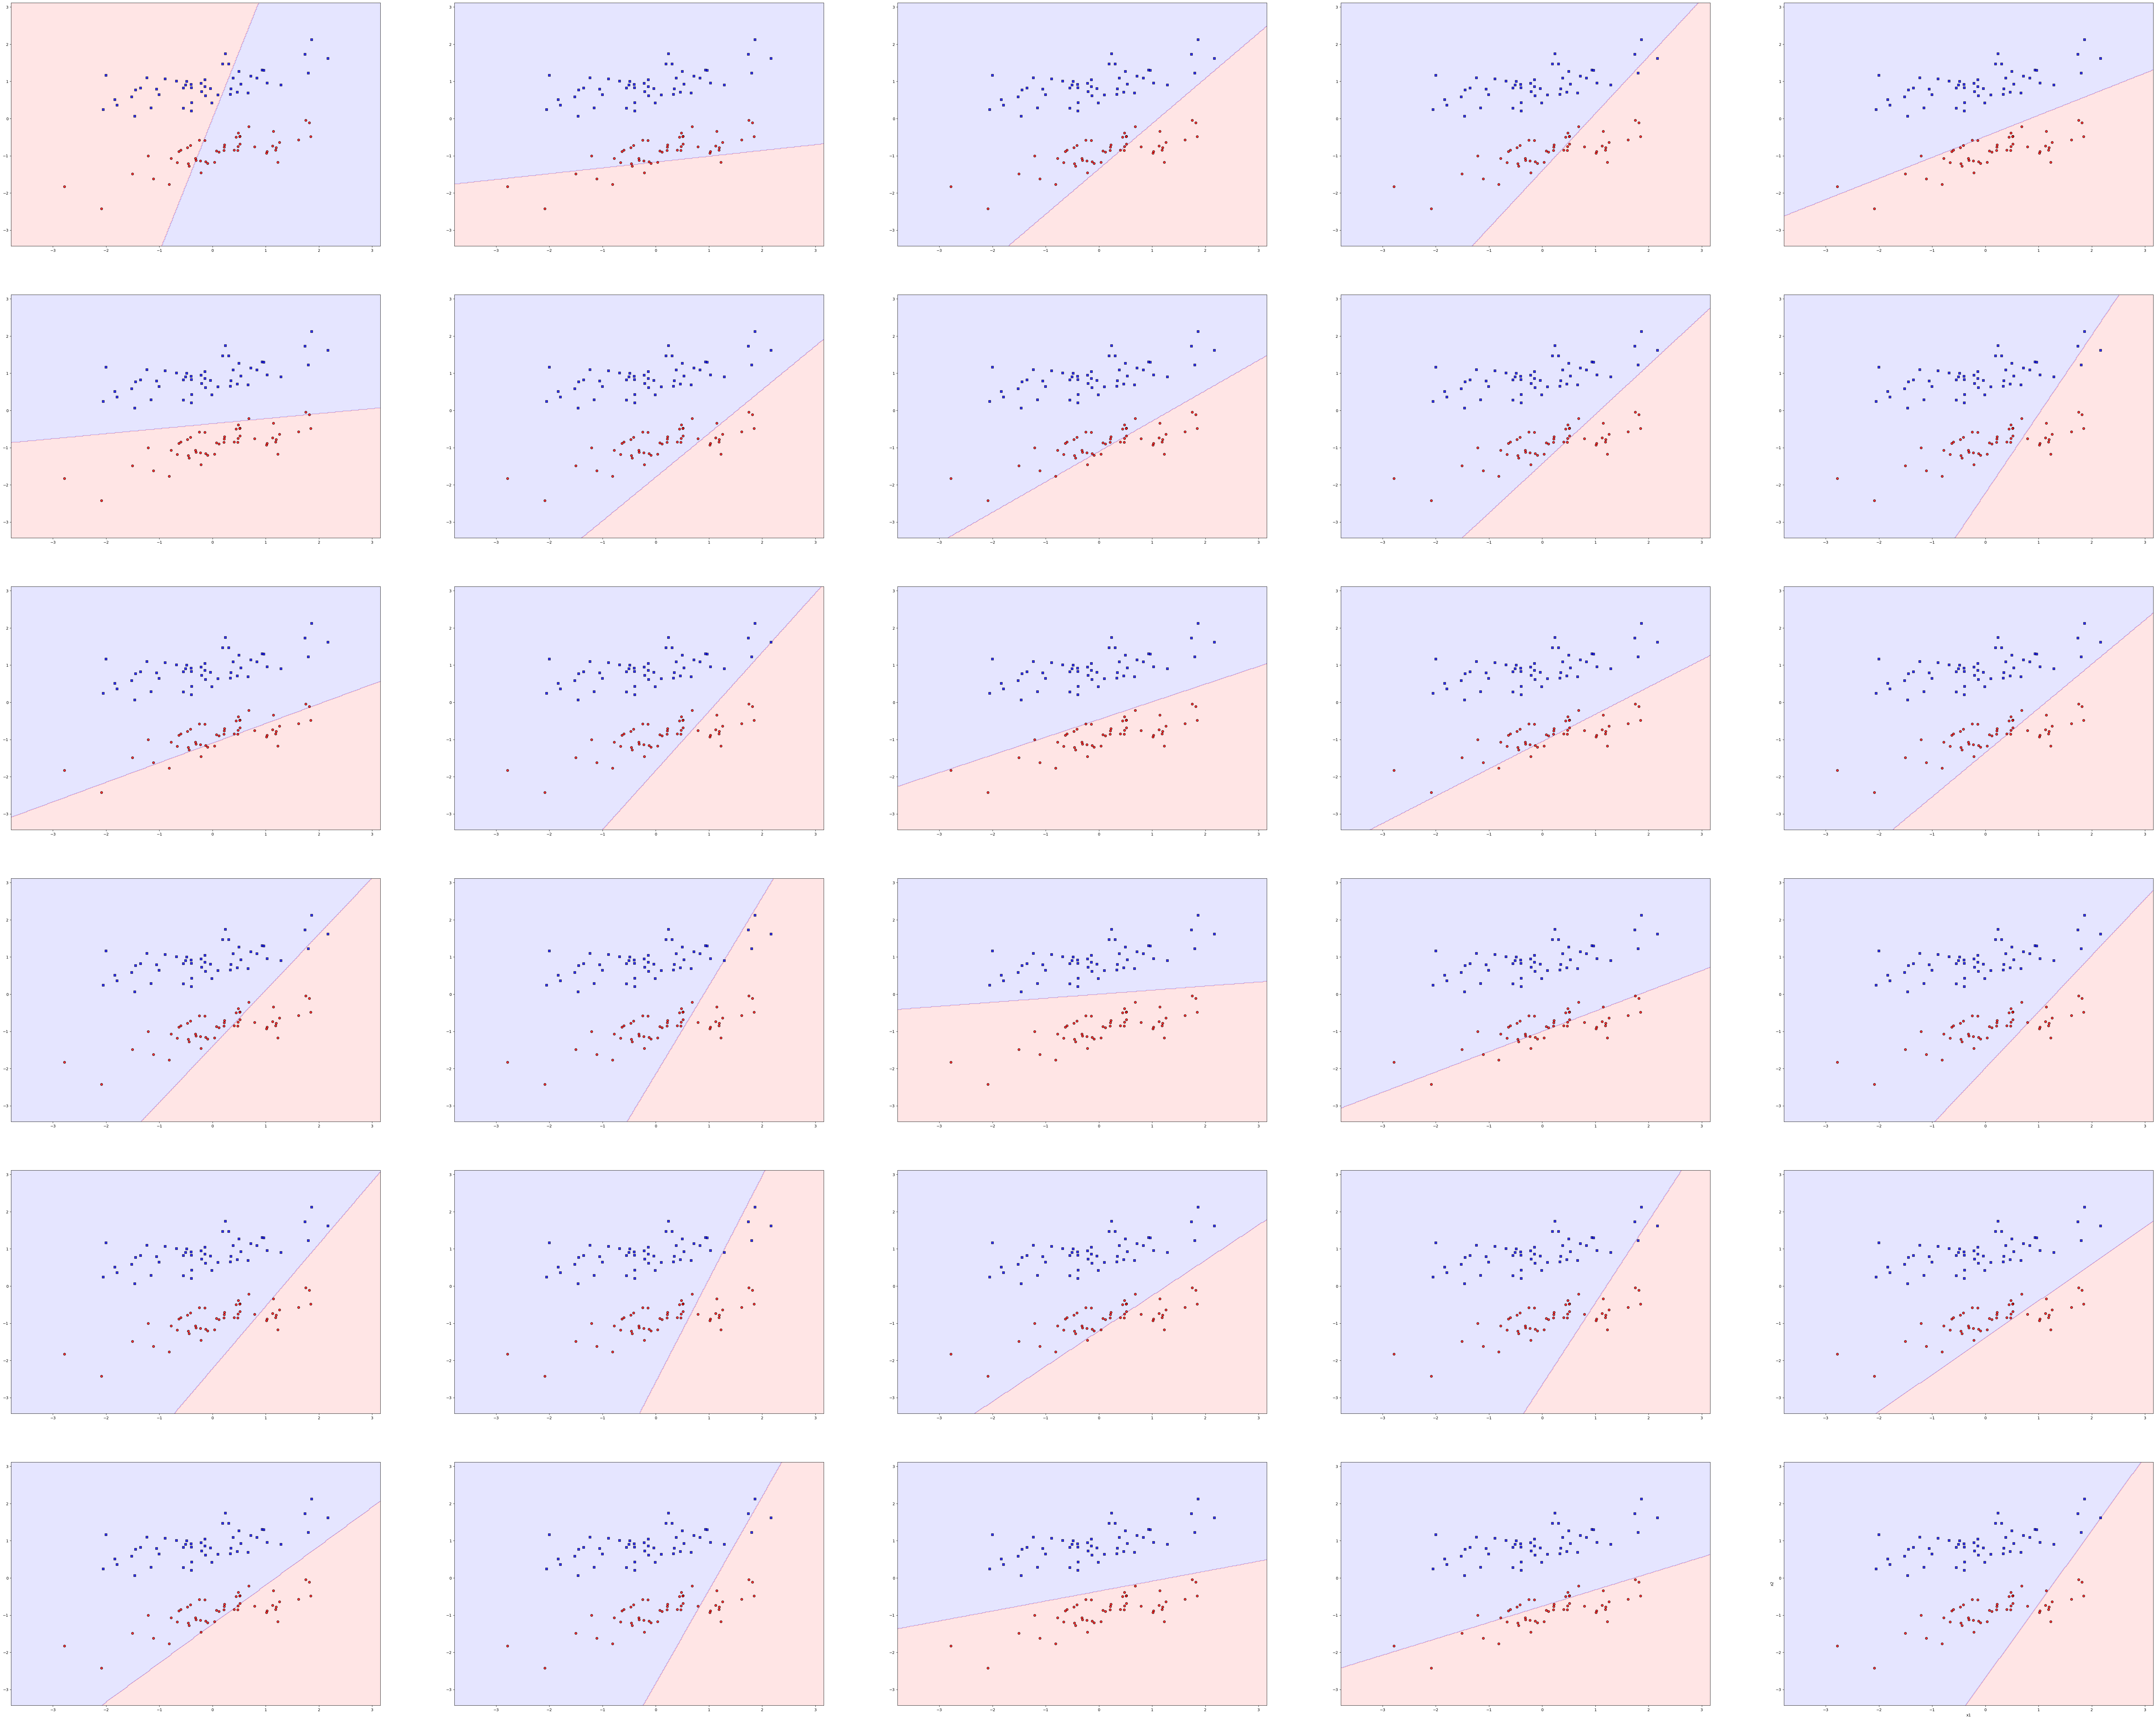

In [98]:
n = 30
n1 = int(n/5)
epochs = range(0,n)
z = 0
fig, ax = plt.subplots(n1, 5, figsize=(100, 80))
for i in epochs:
    percep = Perceptron(lr=0.1, n_iter=i)
    percep.fit(X, y)
    row = int(z/5)
    col = int(z%5)
    z += 1

    plot_decision_regions(X, y, classifier=percep, ax=ax[row, col]) 
    plt.xlabel('x1')
    plt.ylabel('x2')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()

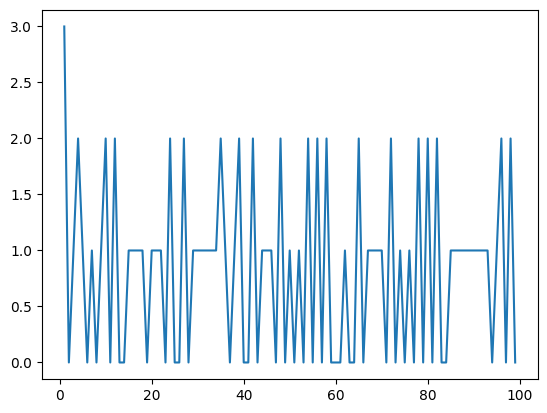

In [97]:
percep.errors_ = [error - 50 for error in percep.errors_]
plt.plot(range(1, len(percep.errors_)+1), percep.errors_)